In [12]:
import networkx as nx
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
M=nx.read_gml("polblogs.gml")

In [14]:
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

C:\Users\jen5e\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\jen5e\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\jen5e\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jen5e\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

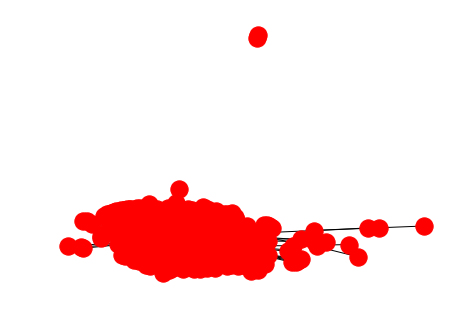

In [15]:
nx.draw(G)

In [16]:
##1. Create a nice looking graph of the political blog network

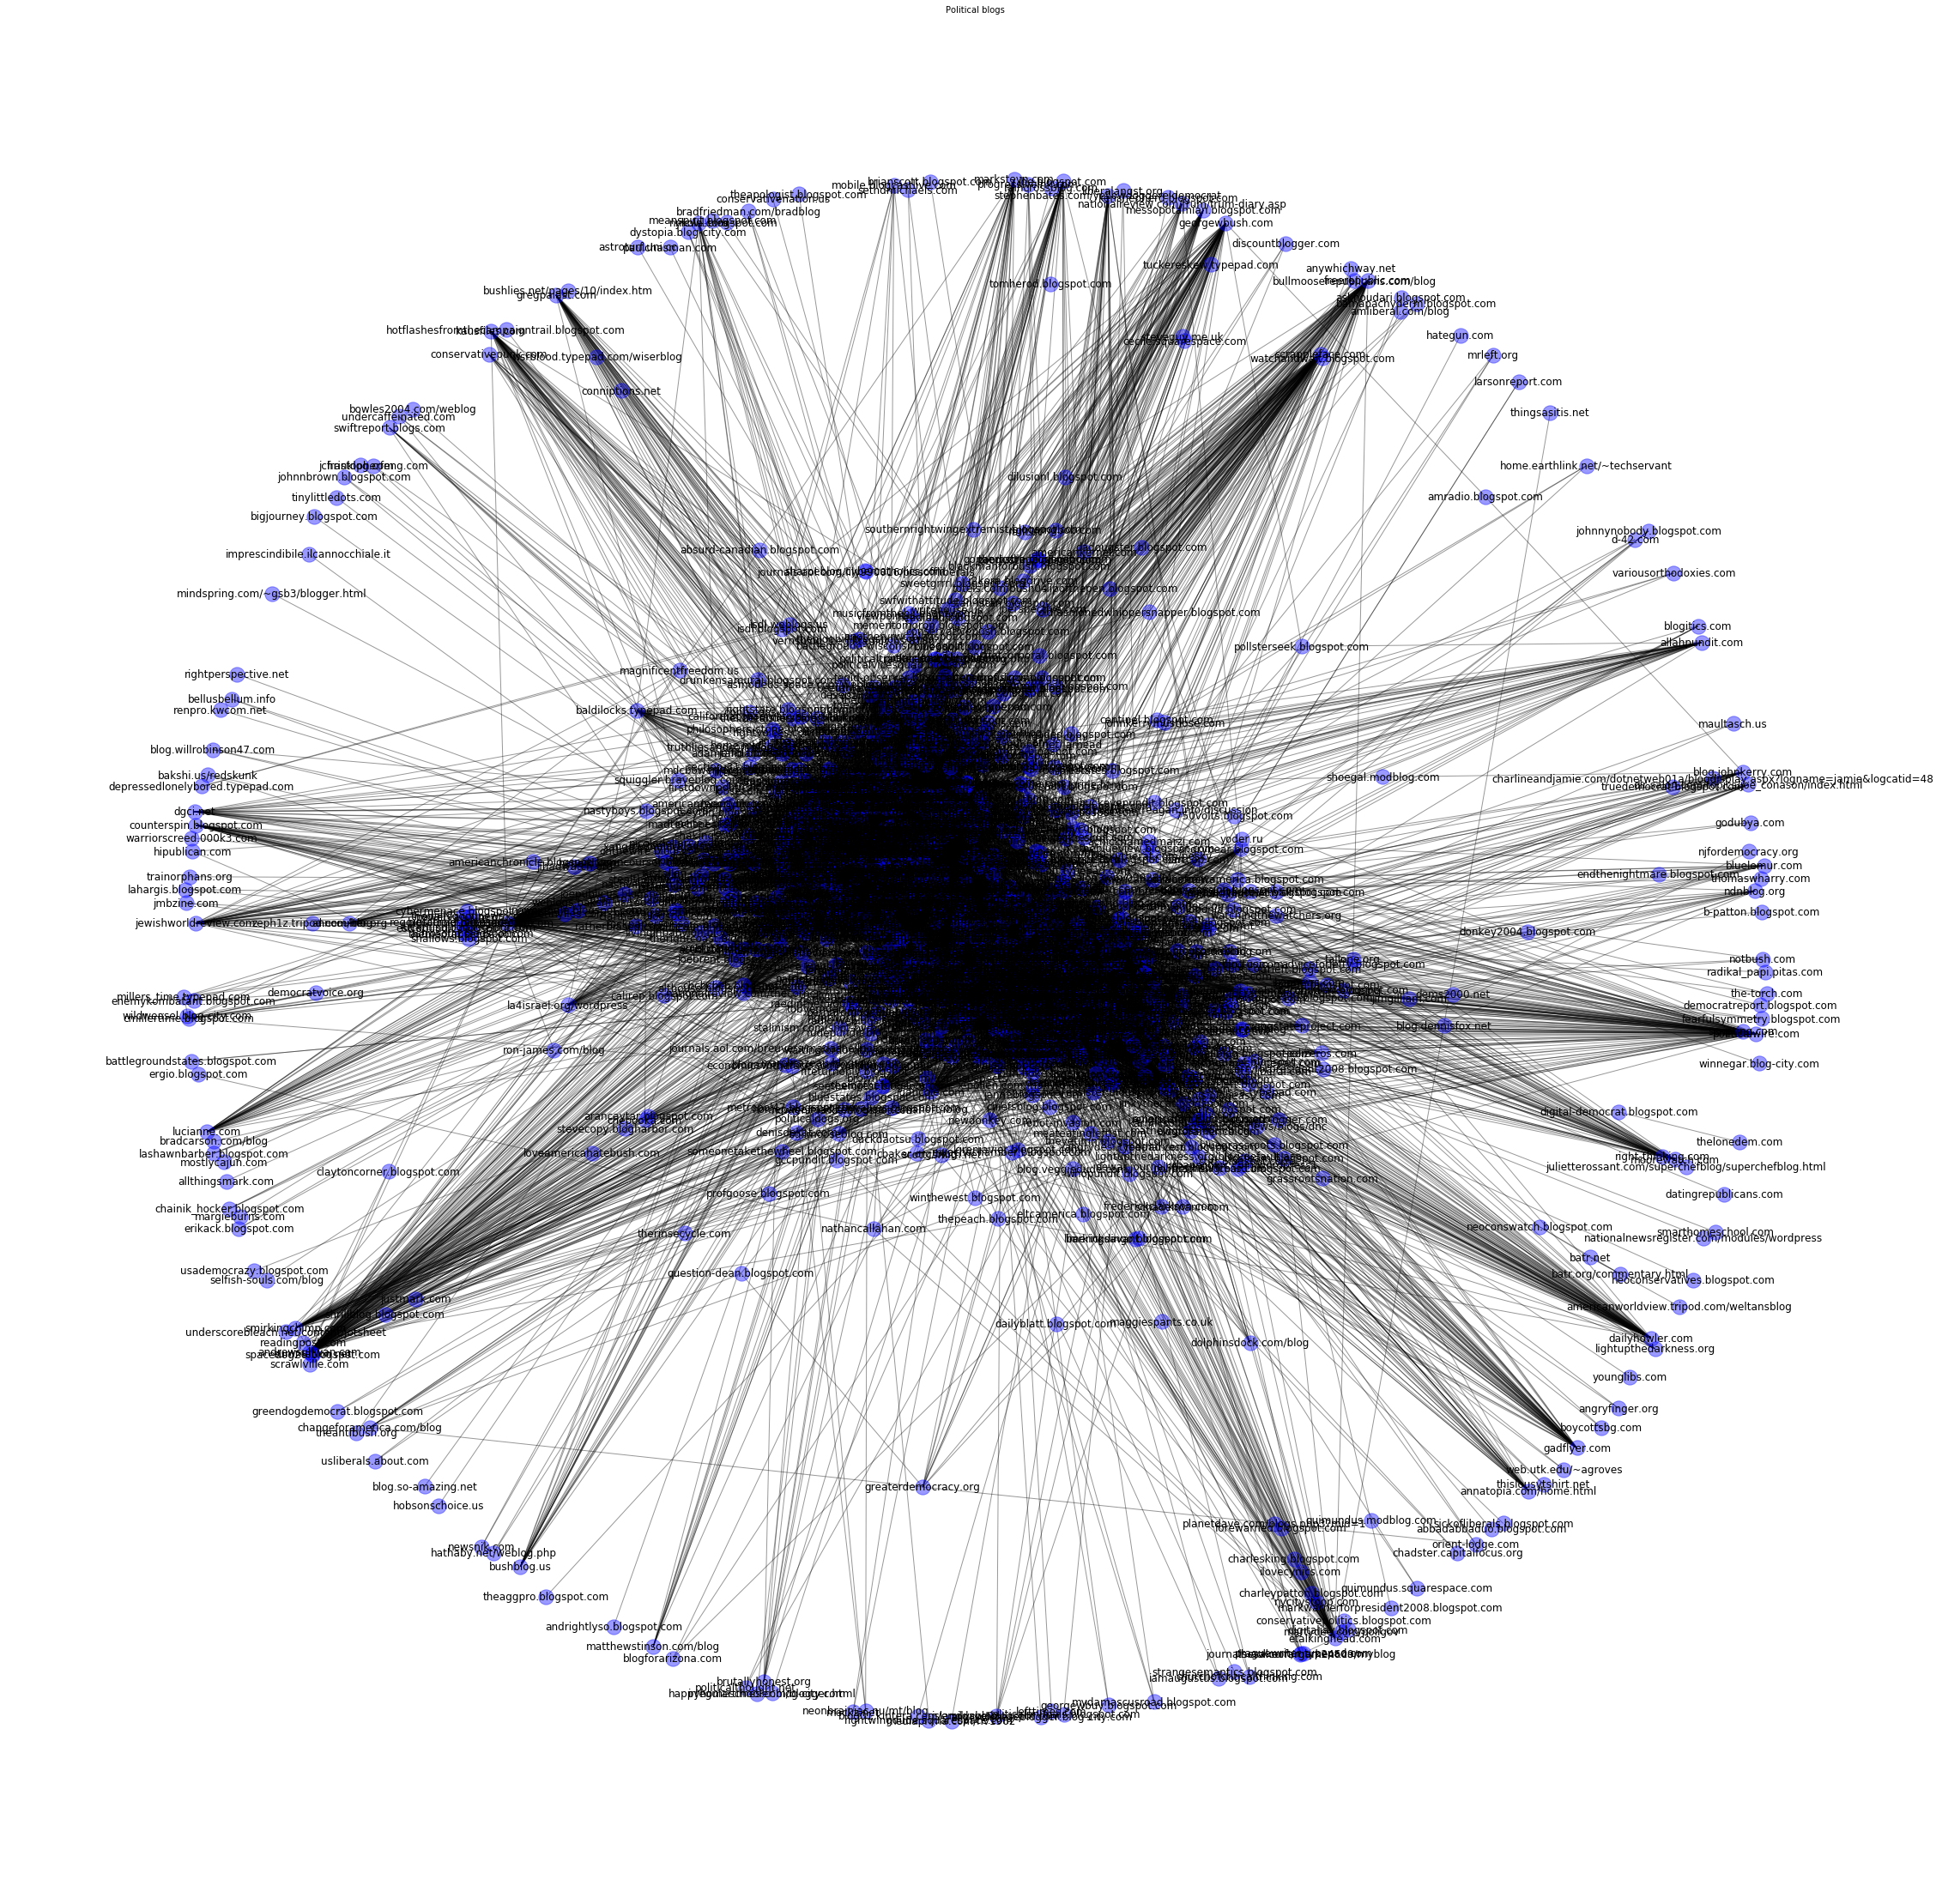

In [17]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(M, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'color'      : 'k',
            'fontsize'   : 10}
plt.title("Political blogs", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [18]:
##2. What are the 10 most influential blogs?

In [19]:
centrality= nx.eigenvector_centrality_numpy(G)

In [20]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [26]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.1948229589885678),
 ('dailykos.com', 0.16090716385818712),
 ('washingtonmonthly.com', 0.14654050463836457),
 ('digbysblog.blogspot.com', 0.14265582251978673),
 ('bodyandsoul.typepad.com', 0.14114853531288907),
 ('liberaloasis.com', 0.13953785666658616),
 ('tbogg.blogspot.com', 0.13704857535546855),
 ('corrente.blogspot.com', 0.12943073134224992),
 ('talkingpointsmemo.com', 0.12700931078294161),
 ('dneiwert.blogspot.com', 0.12238703900638019)]

In [27]:
##3. What are the 10 least influential blogs?

In [28]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]

[('thelonedem.com', -1.3086821030058635e-18),
 ('digital-democrat.blogspot.com', 2.2694525019756685e-18),
 ('americanworldview.tripod.com/weltansblog', 7.489792406838532e-09),
 ('quimundus.modblog.com', 6.675725344497166e-08),
 ('batr.org/commentary.html', 6.794245454763959e-07),
 ('batr.net', 6.795053204402193e-07),
 ('democratvoice.org', 1.022160231723943e-06),
 ('quimundus.squarespace.com', 6.056497487443064e-06),
 ('massachusetts-liberal.com', 9.48471174661439e-06),
 ('thingsasitis.net', 1.1737028626599763e-05)]